In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [2]:
dataset = fetch_california_housing()
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
LR = LinearRegression()
LR.fit(X_train,y_train)
train_score_LR= LR.score(X_train,y_train)

In [5]:
#Lasso regression model
print("\n.....................Lasso Model.................................\n")
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
print("The train score for the lasso model is{}".format(train_score_ls))


.....................Lasso Model.................................

The train score for the lasso model is0.5488267992849574


In [6]:
#Ridge Regression Model
print("\nRidge Model................................................")
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(X_train,y_train)
train_score_ridge =ridgeReg.score(X_train,y_train)
print("The train score for the ridge model is{}".format(train_score_ridge))


Ridge Model................................................
The train score for the ridge model is0.6090156804624769


In [7]:
enet_model = ElasticNet(alpha = 0.1).fit(X_train,y_train)
train_enet_score= enet_model.score(X_train,y_train)

In [8]:
# Testing a model on testing data set
LR_test_score = LR.score(X_test,y_test)
lasso_test_score =lasso.score(X_test,y_test)
Ridge_test_score =ridgeReg.score(X_test,y_test)
enet_test_score = enet_model.score(X_test,y_test)

result = pd.DataFrame({'LR score':[train_score_LR,LR_test_score],
                      'Lasso score':[train_score_ls,lasso_test_score],
                      'Ridge score':[train_score_ridge,Ridge_test_score],
                      'Enet score':[train_enet_score,enet_test_score]},
                       index = ['Train score','Test score'])

In [9]:
print(result)

             LR score  Lasso score  Ridge score  Enet score
Train score  0.609016     0.548827     0.609016    0.579716
Test score   0.594579     0.523638     0.594578    0.557387


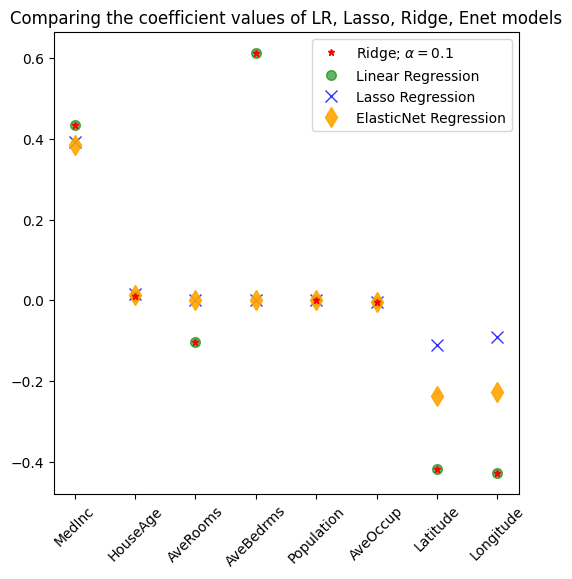

In [10]:
#Lest plot the coefficient for both the linear and ridge models.
plt.figure(figsize = (6,6))
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha=1,linestyle='none',
         marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.1$',zorder=7)

plt.plot(dataset.feature_names,LR.coef_,alpha=0.6,linestyle='none',
         marker='o',markersize=7,color='green',label='Linear Regression')

plt.plot(dataset.feature_names,lasso.coef_,alpha=0.8,linestyle='none',
          marker='x',markersize=9,color='blue',label='Lasso Regression')


plt.plot(dataset.feature_names, enet_model.coef_,alpha=0.9,linestyle='none',
          marker='d',markersize=10,color='orange',label='ElasticNet Regression')

plt.xticks(rotation = 45)
plt.title('Comparing the coefficient values of LR, Lasso, Ridge, Enet models')
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [12]:
#Using the linear CV model
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
#lasso Cross validation
lasso_cv=LassoCV(alphas=[0.0001,0.0002,0.0009,0.0001,0.002,0.0003,0.01,0.1,1,10],
                  random_state=10).fit(X_train,y_train)

#score
print(f'training score:{lasso_cv.score(X_train,y_train)}')
print(lasso_cv.alpha_)

training score:0.6088668691740275
0.002


In [13]:
#Using th#Using the linear CV model Ridge cross validation
from sklearn.linear_model import ElasticNetCV

#ElasticNet Cross validation
ElasticNet_cv = ElasticNetCV(alphas = [0.001,0.002,0.003,0.025,0.035,0.01,0.02,0.1,0.2,1.1,1.10]).fit(X_train,y_train)

#score
print("The train score for elasticnetCV model is {}".format(ElasticNet_cv.score(X_train,y_train)))
ElasticNet_cv.alpha_

The train score for elasticnetCV model is 0.6088376784780601


0.003

In [14]:
np.log(4)

1.3862943611198906

In [16]:
alpha = np.logspace(-4,-1,10)
(np.empty_like(alpha))
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [19]:
alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test,y_test)
print(scores)

[0.59454473 0.59450471 0.59441549 0.59420946 0.59370145 0.59230927
 0.58792785 0.57907547 0.5666033  0.52363775]


0.03221092661065104


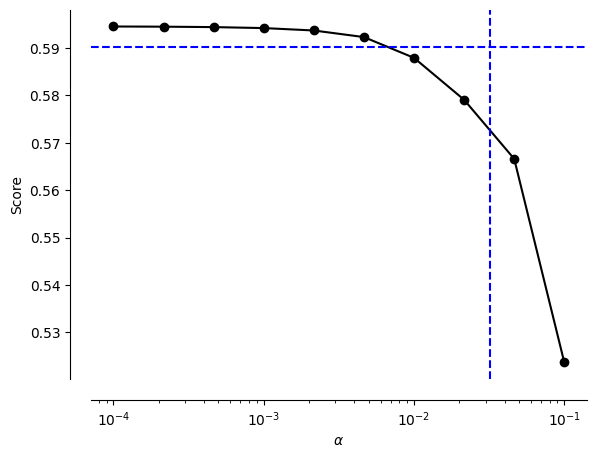

In [22]:
lassocv = LassoCV(random_state=0)
lassocv.fit(X,y,)
lassocv_score = lassocv.score(X,y)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
plt.plot(alphas,scores,'-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

In [ ]:
#elastic net regressor

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3,1,num=30)

model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train,return_estimator=True, n_jobs=2)
print(cv_results)

{'fit_time': array([0.12013578, 0.11714268, 0.09527636, 0.09427905, 0.06903338]), 'score_time': array([0.0009985 , 0.00199509, 0.00199533, 0.00199437, 0.00143337]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [27]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean(): 3f} +- {score.std():3f}")

[0.63949534 0.60571284 0.61115815 0.56191319 0.60883357]
R2 score:  0.605423 +- 0.024894


In [28]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [29]:
from ucimlrepo import fetch_ucirepo
#fetch datset
wine_quality = fetch_ucirepo(id=186)

In [30]:
#data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets
print(y)


      quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]


In [33]:
#meta data
print(wine_quality.metadata)

#variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc